# Linear Regression Attempt 1
## Issues with this preliminary model

- While this model shows an error of ~20% ((RMSE(646))/(Actual LowerSocialClass(3181))), the data has not been appropriately normalised and therefore the actual inaccuracy is likely to be much higher than indicated.

In [1]:
# Import necessary packages
# Packages needed are: Pandas, Seaborn, Scipy, Statsmodels.formula.api and Matplotlip.pyplot

# Sys needed to point to some packages
# import sys
# sys.path.append('C:/Users/Eóin/Anaconda3/envs/comp47350/lib/site-packages')
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

# Show the correlation value in the plot.
%matplotlib inline

- Many of the cells below are similar to what is performed in Combine.ipynb.
<br><br>
- This notebook does not include population density or any 'per capita' features.

In [2]:
df_allcrime= pd.read_csv('CRIMEDATADUBGALROS.csv')
df_allcrime.head(40)

,Garda Station,03 Attempts/threats to murder assaults harassments and related offences,04 Dangerous or negligent acts,05 Kidnapping and related offences,06 Robbery extortion and hijacking offences,07 Burglary and related offences,08 Theft and related offences,09 Fraud deception and related offences,10 Controlled drug offences,11 Weapons and Explosives Offences,12 Damage to property and to the environment,13 Public order and other social code offences,15 Offences against government justice procedures and organisation of crime
0,Salthill,66,52,0,3,104,183,13,74,7,163,168,7
1,Galway,340,163,3,31,360,1121,110,180,29,471,1562,223
2,Balbriggan,96,72,0,16,177,510,66,113,22,257,168,45
3,Ballyfermot,82,91,0,22,250,608,22,327,62,368,420,32
4,Ballymun,166,51,3,47,142,514,30,230,46,394,338,20
5,BlackrockCoDublin,58,48,0,13,230,594,96,60,14,181,163,10
6,Blanchardstown,336,207,2,144,646,2225,164,415,110,970,597,517
7,BridewellDublin,117,57,1,75,204,708,49,250,72,434,591,3586
8,Cabinteely,49,34,2,23,207,391,15,59,12,173,126,11
9,Cabra,90,40,0,33,139,470,39,118,15,292,279,27


In [3]:
df_crimelist = list(df_allcrime)
df_allcrime["Theft"] = df_allcrime[df_crimelist[4:6]].sum(axis=1)
df_allcrime["Assault & Kidnapping"] = df_allcrime[df_crimelist[1:3]].sum(axis=1)
df_allcrime["Fraud & Drugs & Weapons"] = df_allcrime[df_crimelist[7:9]].sum(axis=1)
df_allcrime["Environment & Public Order"] = df_allcrime[df_crimelist[10:]].sum(axis=1)

df_allcrime.head(40)

,Garda Station,03 Attempts/threats to murder assaults harassments and related offences,04 Dangerous or negligent acts,05 Kidnapping and related offences,06 Robbery extortion and hijacking offences,07 Burglary and related offences,08 Theft and related offences,09 Fraud deception and related offences,10 Controlled drug offences,11 Weapons and Explosives Offences,12 Damage to property and to the environment,13 Public order and other social code offences,15 Offences against government justice procedures and organisation of crime,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order
0,Salthill,66,52,0,3,104,183,13,74,7,163,168,7,107,118,87,338
1,Galway,340,163,3,31,360,1121,110,180,29,471,1562,223,391,503,290,2256
2,Balbriggan,96,72,0,16,177,510,66,113,22,257,168,45,193,168,179,470
3,Ballyfermot,82,91,0,22,250,608,22,327,62,368,420,32,272,173,349,820
4,Ballymun,166,51,3,47,142,514,30,230,46,394,338,20,189,217,260,752
5,BlackrockCoDublin,58,48,0,13,230,594,96,60,14,181,163,10,243,106,156,354
6,Blanchardstown,336,207,2,144,646,2225,164,415,110,970,597,517,790,543,579,2084
7,BridewellDublin,117,57,1,75,204,708,49,250,72,434,591,3586,279,174,299,4611
8,Cabinteely,49,34,2,23,207,391,15,59,12,173,126,11,230,83,74,310
9,Cabra,90,40,0,33,139,470,39,118,15,292,279,27,172,130,157,598


In [4]:
# Drop individual crime rows
df_allcrime = df_allcrime.drop(['03 Attempts/threats to murder assaults harassments and related offences', 
                                '04 Dangerous or negligent acts',
                                '05 Kidnapping and related offences',
                                '06 Robbery extortion and hijacking offences',
                                '07 Burglary and related offences',
                                '08 Theft and related offences',
                                '09 Fraud deception and related offences',
                                '10 Controlled drug offences',
                                '11 Weapons and Explosives Offences',
                                '12 Damage to property and to the environment',
                                '13 Public order and other social code offences',
                                '15 Offences against government justice procedures and organisation of crime'], axis=1)

df_allcrime.head(40)

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order
0,Salthill,107,118,87,338
1,Galway,391,503,290,2256
2,Balbriggan,193,168,179,470
3,Ballyfermot,272,173,349,820
4,Ballymun,189,217,260,752
5,BlackrockCoDublin,243,106,156,354
6,Blanchardstown,790,543,579,2084
7,BridewellDublin,279,174,299,4611
8,Cabinteely,230,83,74,310
9,Cabra,172,130,157,598


In [5]:
df_allcrime.head(34)
df_allcrime.to_csv('FINALCRIME.csv')

In [6]:
df_allcrime.describe().T

,count,mean,std,min,25%,50%,75%,max
Theft,40.0,246.250,186.109941,0.0,100.50,236.5,380.25,790.0
Assault & Kidnapping,40.0,168.550,149.003347,3.0,68.75,121.5,222.50,643.0
Fraud & Drugs & Weapons,40.0,192.825,172.322876,0.0,76.25,157.0,263.00,608.0
Environment & Public Order,40.0,788.625,964.871658,3.0,229.50,466.0,859.50,4611.0


In [7]:
# Mean of theft feature
df_allcrime.Theft.mean()

246.25

In [8]:
# show data types
df_allcrime.dtypes

Garda Station                 object
Theft                          int64
Assault & Kidnapping           int64
Fraud & Drugs & Weapons        int64
Environment & Public Order     int64
dtype: object

In [9]:
# begin to combine census data frames
df_census = pd.read_csv('finalcensus2.csv')
df_census.head(40)

,Unnamed: 0,GardaStation,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,PrincipalStatusLookingForFirstJob,PrincipalStatusUnemployed,PrincipalStatusStudent,PrincipalStatusLookingAfterHome/Family,...,HighestLevelEducationNotStated,GeneralHealthVeryGood,GeneralHealthGood,GeneralHealthFair,GeneralHealthBad,GeneralHealthVeryBad,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18
0,0,Kevin Street,14740,14332,29072,13293,410,3015,4736,1158,...,1224,15946,8625,2548,476,116,1361,2077,2072,4149
1,1,Kilmainham,11724,12183,23907,11192,228,2399,2075,1127,...,1151,13045,6712,2357,524,171,1098,2085,1996,4081
2,2,Dun Laoghaire,17676,19938,37614,15146,176,2039,3884,2962,...,1070,23149,10073,2938,502,124,828,4006,3976,7982
3,3,Cabinteely,15800,16954,32754,13227,153,1571,3710,2849,...,789,21554,8113,2025,303,74,685,4157,3983,8140
4,4,Shankill,10929,11765,22694,9171,174,1670,2321,1757,...,674,14517,5784,1618,256,57,462,3218,2969,6187
5,5,Blanchardstown,48192,49886,98078,42376,1007,8585,7726,6018,...,3114,62945,25938,5398,904,195,2698,15255,14502,29757
6,6,Balbriggan,11746,12296,24042,9191,267,2235,1642,1666,...,576,15012,6532,1638,281,66,513,4134,3892,8026
7,7,Ballyfermot,13247,14332,27579,9627,339,3234,1922,2074,...,833,14998,8213,3122,546,133,567,3426,3286,6712
8,8,Ballymun,10408,11267,21675,6870,269,2778,2307,1644,...,940,11863,6412,2150,426,75,749,2993,2893,5886
9,9,BlackrockCoDublin,15003,16975,31978,13827,145,1152,4352,2363,...,552,21700,7535,1883,284,65,511,3563,3469,7032


In [10]:
# read green count to merge with other data
green = pd.read_csv('GreenSpaceCount.csv')
green.head(40)

,Location,Green
0,Galway,19
1,Salthill,9
2,Shankill,10
3,Fitzgibbon Street,1
4,Coolock,2
5,Airport,0
6,Raheny,4
7,Santry,22
8,Malahide,4
9,Lucan,4


In [11]:
# New data frame with green count and census data
df_censusgreen = pd.merge(left=df_census, right=green, how='left', left_on='GardaStation', right_on='Location')
df_censusgreen.head(40)

,Unnamed: 0,GardaStation,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,PrincipalStatusLookingForFirstJob,PrincipalStatusUnemployed,PrincipalStatusStudent,PrincipalStatusLookingAfterHome/Family,...,GeneralHealthGood,GeneralHealthFair,GeneralHealthBad,GeneralHealthVeryBad,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Location,Green
0,0,Kevin Street,14740,14332,29072,13293,410,3015,4736,1158,...,8625,2548,476,116,1361,2077,2072,4149,Kevin Street,1
1,1,Kilmainham,11724,12183,23907,11192,228,2399,2075,1127,...,6712,2357,524,171,1098,2085,1996,4081,Kilmainham,3
2,2,Dun Laoghaire,17676,19938,37614,15146,176,2039,3884,2962,...,10073,2938,502,124,828,4006,3976,7982,Dun Laoghaire,22
3,3,Cabinteely,15800,16954,32754,13227,153,1571,3710,2849,...,8113,2025,303,74,685,4157,3983,8140,Cabinteely,35
4,4,Shankill,10929,11765,22694,9171,174,1670,2321,1757,...,5784,1618,256,57,462,3218,2969,6187,Shankill,10
5,5,Blanchardstown,48192,49886,98078,42376,1007,8585,7726,6018,...,25938,5398,904,195,2698,15255,14502,29757,Blanchardstown,15
6,6,Balbriggan,11746,12296,24042,9191,267,2235,1642,1666,...,6532,1638,281,66,513,4134,3892,8026,Balbriggan,9
7,7,Ballyfermot,13247,14332,27579,9627,339,3234,1922,2074,...,8213,3122,546,133,567,3426,3286,6712,Ballyfermot,4
8,8,Ballymun,10408,11267,21675,6870,269,2778,2307,1644,...,6412,2150,426,75,749,2993,2893,5886,Ballymun,4
9,9,BlackrockCoDublin,15003,16975,31978,13827,145,1152,4352,2363,...,7535,1883,284,65,511,3563,3469,7032,BlackrockCoDublin,3


In [12]:
# Merge on Garda Station Name

df_censuscrime = pd.merge(df_allcrime, df_censusgreen, left_on='Garda Station', right_on='GardaStation')
df_censuscrime.head()

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,Unnamed: 0,GardaStation,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,...,GeneralHealthGood,GeneralHealthFair,GeneralHealthBad,GeneralHealthVeryBad,GeneralHealthNotStated,Total_Under18Male,Total_Under18Female,Total_Under18,Location,Green
0,Salthill,107,118,87,338,32,Salthill,13856,15474,29330,...,7607,1758,257,42,617,3949,3766,7715,Salthill,9
1,Galway,391,503,290,2256,33,Galway,22255,22889,45144,...,13928,3849,645,153,1631,4144,3992,8136,Galway,19
2,Balbriggan,193,168,179,470,6,Balbriggan,11746,12296,24042,...,6532,1638,281,66,513,4134,3892,8026,Balbriggan,9
3,Ballyfermot,272,173,349,820,7,Ballyfermot,13247,14332,27579,...,8213,3122,546,133,567,3426,3286,6712,Ballyfermot,4
4,Ballymun,189,217,260,752,8,Ballymun,10408,11267,21675,...,6412,2150,426,75,749,2993,2893,5886,Ballymun,4


In [13]:
# Drop duplicate columns
df_censuscrime = df_censuscrime.drop(df_censuscrime[[5, 6, 57]], axis=1)

In [14]:
# view headings

df_censuscrimetrans = df_censuscrime.transpose()
df_censuscrimetrans.index.get_values()

array(['Garda Station', 'Theft', 'Assault & Kidnapping',
       'Fraud & Drugs & Weapons', 'Environment & Public Order',
       'PopulationTotalMale', 'PopulationTotalFemale', 'PopulationTotal',
       'PrincipalStatusAtWork', 'PrincipalStatusLookingForFirstJob',
       'PrincipalStatusUnemployed', 'PrincipalStatusStudent',
       'PrincipalStatusLookingAfterHome/Family', 'PrincipalStatusRetired',
       'PrincipalStatusUnableToWork', 'PrincipalStatusOther',
       'SocialClassProfessionalWorkers',
       'SocialClassManagerialAndTechnical', 'SocialClassNonManual',
       'SocialClassSkilledManual', 'SocialClassSemiSkilled',
       'SocialClassUnskilled', 'SocialClassOther',
       'AgeEducationCeasedUnder15', 'AgeEducationCeasedAge15',
       'AgeEducationCeasedAge16', 'AgeEducationCeasedAge17',
       'AgeEducationCeasedAge18', 'AgeEducationCeasedAge19',
       'AgeEducationCeasedAge20', 'AgeEducationCeasedAge21+',
       'AgeEducationCeasedNotStated', 'EducationNotCeasedStillAtSchoo

In [15]:
# Summing features to narrow down columns and features
df_censuscrimelist = list(df_censuscrime)
df_censuscrime["NoLowEducation"] = df_censuscrime[df_censuscrimelist[34:37]].sum(axis=1)
df_censuscrime["MiddleEducation"] = df_censuscrime[df_censuscrimelist[38:40]].sum(axis=1)
df_censuscrime["HighEducation"] = df_censuscrime[df_censuscrimelist[41:44]].sum(axis=1)
df_censuscrime["LowerSocialClass"] = df_censuscrime[df_censuscrimelist[20:22]].sum(axis=1)
df_censuscrime["HigherSocialClass"] = df_censuscrime[df_censuscrimelist[16:19]].sum(axis=1)
df_censuscrime["EducationCeasedYoung"] = df_censuscrime[df_censuscrimelist[23:27]].sum(axis=1)
df_censuscrime["ContinuedEducation"] = df_censuscrime[df_censuscrimelist[29:32]].sum(axis=1)
df_censuscrime["StillInEducation"] = df_censuscrime[df_censuscrimelist[33:34]].sum(axis=1)
df_censuscrime["GoodHealth"] = df_censuscrime[df_censuscrimelist[46:48]].sum(axis=1)
df_censuscrime["PoorHealth"] = df_censuscrime[df_censuscrimelist[49:50]].sum(axis=1)
df_censuscrime["TotalCrime"] = df_censuscrime[df_censuscrimelist[1:4]].sum(axis=1)

df_censuscrimetrans = df_censuscrime.transpose()
df_censuscrimetrans.index.get_values()

array(['Garda Station', 'Theft', 'Assault & Kidnapping',
       'Fraud & Drugs & Weapons', 'Environment & Public Order',
       'PopulationTotalMale', 'PopulationTotalFemale', 'PopulationTotal',
       'PrincipalStatusAtWork', 'PrincipalStatusLookingForFirstJob',
       'PrincipalStatusUnemployed', 'PrincipalStatusStudent',
       'PrincipalStatusLookingAfterHome/Family', 'PrincipalStatusRetired',
       'PrincipalStatusUnableToWork', 'PrincipalStatusOther',
       'SocialClassProfessionalWorkers',
       'SocialClassManagerialAndTechnical', 'SocialClassNonManual',
       'SocialClassSkilledManual', 'SocialClassSemiSkilled',
       'SocialClassUnskilled', 'SocialClassOther',
       'AgeEducationCeasedUnder15', 'AgeEducationCeasedAge15',
       'AgeEducationCeasedAge16', 'AgeEducationCeasedAge17',
       'AgeEducationCeasedAge18', 'AgeEducationCeasedAge19',
       'AgeEducationCeasedAge20', 'AgeEducationCeasedAge21+',
       'AgeEducationCeasedNotStated', 'EducationNotCeasedStillAtSchoo

In [16]:
df_censuscrime.head()

,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,PrincipalStatusLookingForFirstJob,...,MiddleEducation,HighEducation,LowerSocialClass,HigherSocialClass,EducationCeasedYoung,ContinuedEducation,StillInEducation,GoodHealth,PoorHealth,TotalCrime
0,Salthill,107,118,87,338,13856,15474,29330,12545,184,...,2176,7841,2691,18473,2321,13165,1695,26656,257,312
1,Galway,391,503,290,2256,22255,22889,45144,17788,441,...,3578,8318,6299,19175,5453,18626,3123,38866,645,1184
2,Balbriggan,193,168,179,470,11746,12296,24042,9191,267,...,2503,2857,3520,11808,3946,7305,1582,21544,281,540
3,Ballyfermot,272,173,349,820,13247,14332,27579,9627,339,...,2257,2445,5774,10421,9478,7067,1247,23211,546,794
4,Ballymun,189,217,260,752,10408,11267,21675,6870,269,...,1592,1728,3939,7983,5583,5804,1405,18275,426,666


In [17]:
# Save correlations to csv
df_censuscrime.corr()
df_censuscrime.corr().to_csv('Correlations-ModelAttempt1.csv')

In [18]:
df_censuscrime.to_csv('CombinedFinalPrelim.csv')

PermissionError: [Errno 13] Permission denied: 'CombinedFinal.csv'

In [19]:
df_censuscrime = pd.read_csv('CombinedFinalPrelim.csv')
df_censuscrime.head()

,Unnamed: 0,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,MiddleEducation,HighEducation,EducationCeasedYoung,ContinuedEducation,StillInEducation,GoodHealth,PoorHealth,TotalCrime,LowerSocialClass,HigherSocialClass
0,0,Salthill,107,118,87,338,13856,15474,29330,12545,...,2176,7841,2321,13165,1695,26656,257,312,2691,18473
1,1,Galway,391,503,290,2256,22255,22889,45144,17788,...,3578,8318,5453,18626,3123,38866,645,1184,6299,19175
2,2,Balbriggan,193,168,179,470,11746,12296,24042,9191,...,2503,2857,3946,7305,1582,21544,281,540,3520,11808
3,3,Ballyfermot,272,173,349,820,13247,14332,27579,9627,...,2257,2445,9478,7067,1247,23211,546,794,5774,10421
4,4,Ballymun,189,217,260,752,10408,11267,21675,6870,...,1592,1728,5583,5804,1405,18275,426,666,3939,7983


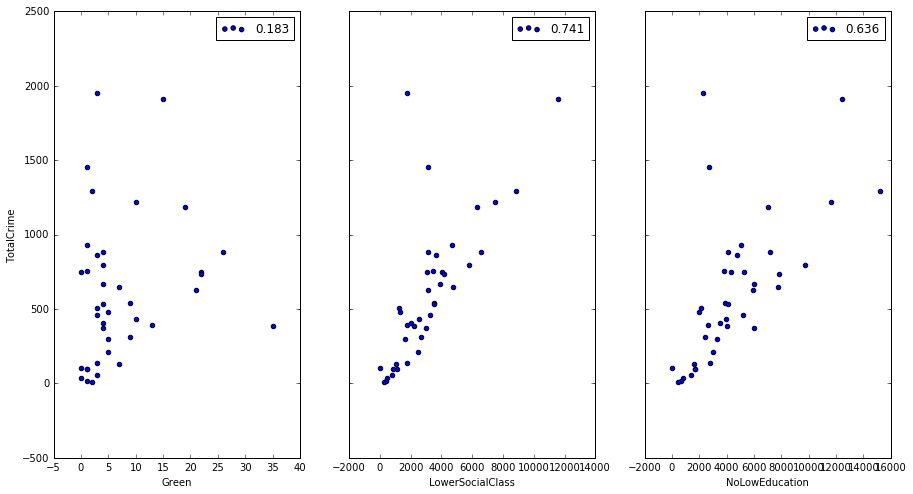

In [20]:
# Scatterplots between features of interest and target feature
fig, axs = plt.subplots(1, 3, sharey=True)
df_censuscrime.plot(kind='scatter', x='Green', y='TotalCrime', label="%.3f" % df_censuscrime[['Green', 'TotalCrime']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df_censuscrime.plot(kind='scatter', x='LowerSocialClass', y='TotalCrime', label="%.3f" % df_censuscrime[['LowerSocialClass', 'TotalCrime']].corr().as_matrix()[0,1], ax=axs[1])
df_censuscrime.plot(kind='scatter', x='NoLowEducation', y='TotalCrime', label="%.3f" % df_censuscrime[['NoLowEducation', 'TotalCrime']].corr().as_matrix()[0,1], ax=axs[2])

plt.savefig('Scatters-Crime-ModelAttempt1.png')

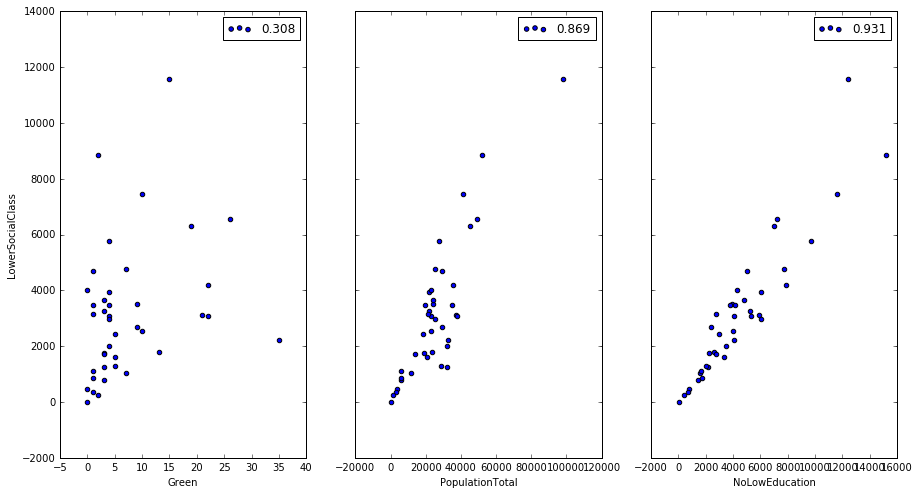

In [21]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
fig, axs = plt.subplots(1, 3, sharey=True)
df_censuscrime.plot(kind='scatter', x='Green', y='LowerSocialClass', label="%.3f" % df_censuscrime[['Green', 'LowerSocialClass']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df_censuscrime.plot(kind='scatter', x='PopulationTotal', y='LowerSocialClass', label="%.3f" % df_censuscrime[['PopulationTotal', 'LowerSocialClass']].corr().as_matrix()[0,1], ax=axs[1])
df_censuscrime.plot(kind='scatter', x='NoLowEducation', y='LowerSocialClass', label="%.3f" % df_censuscrime[['NoLowEducation', 'LowerSocialClass']].corr().as_matrix()[0,1], ax=axs[2])

plt.savefig('Scatters-LowerSocialClass-ModelAttempt1.png')

In [22]:
#import sys
#sys.path.append('C:/Users/Eóin/Anaconda3/envs/comp47350/lib/site-packages')
import statsmodels.formula.api as sm

# Model using one feature

lm = sm.ols(formula="TotalCrime ~ Green", data=df_censuscrime).fit()
print(lm.params)

Intercept    529.404574
Green         10.715127
dtype: float64


In [23]:
# New data frame for prediction
X_new = pd.DataFrame({'Green': [7]})
X_new.head()

,Green
0,7


In [24]:
# Predict value for Total Crime using moddel
lm.predict(X_new)

array([ 604.41046194])

In [25]:
# Predict max and min using model
X_minmax = pd.DataFrame({'Green': [df_censuscrime.Green.min(), df_censuscrime.Green.max()]})
X_minmax.head()

,Green
0,0
1,35


In [26]:
# Assign to data frame
predictions = lm.predict(X_minmax)
predictions

array([ 529.40457377,  904.43401459])

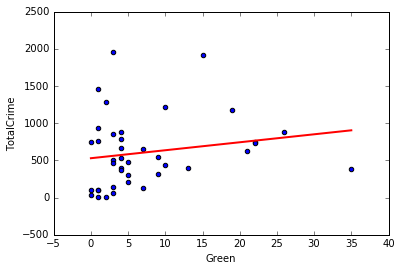

In [27]:
df_censuscrime.plot(kind='scatter', x='Green', y='TotalCrime')

plt.plot(X_minmax, predictions, c='red', linewidth=2)
plt.savefig('LinearModel-Green&TotalCrime-ModelAttempt1.png')

In [28]:
# R-squared value here is 0.034 indicating that only 3% variability can be explained using this model
# For a feature to be significant its p-value must be < 0.05
# The p-value of 0.258 indicates only an 75% confidence level in predicting
# total crime levels using this feature
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalCrime   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.318
Date:                Sat, 07 May 2016   Prob (F-statistic):              0.258
Time:                        21:46:58   Log-Likelihood:                -302.59
No. Observations:                  40   AIC:                             609.2
Df Residuals:                      38   BIC:                             612.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    529.4046    101.871      5.197      0.0

# =====================================

In [79]:
df_censuscrime.corr()

,Unnamed: 0,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,PrincipalStatusLookingForFirstJob,...,MiddleEducation,HighEducation,EducationCeasedYoung,ContinuedEducation,StillInEducation,GoodHealth,PoorHealth,TotalCrime,LowerSocialClass,HigherSocialClass
Unnamed: 0,1.000000,-0.309867,-0.262899,-0.267499,-0.264543,-0.440516,-0.456254,-0.448964,-0.409867,-0.433543,...,-0.352690,-0.442498,-0.347067,-0.459585,-0.389086,-0.444685,-0.435380,-0.297246,-0.383531,-0.415463
Theft,-0.309867,1.000000,0.875694,0.811267,0.668676,0.740370,0.721585,0.731300,0.760554,0.781302,...,0.626006,0.662853,0.599686,0.751181,0.802095,0.708286,0.702976,0.949085,0.680750,0.622134
Assault & Kidnapping,-0.262899,0.875694,1.000000,0.858808,0.738197,0.618068,0.587865,0.603027,0.615087,0.733414,...,0.548983,0.436638,0.493717,0.588757,0.760083,0.577131,0.608216,0.956529,0.655662,0.423068
Fraud & Drugs & Weapons,-0.267499,0.811267,0.858808,1.000000,0.689742,0.640944,0.616852,0.629065,0.627412,0.744443,...,0.615150,0.356470,0.684661,0.547003,0.724912,0.603387,0.666550,0.938441,0.765403,0.433486
Environment & Public Order,-0.264543,0.668676,0.738197,0.689742,1.000000,0.364805,0.326716,0.345504,0.383314,0.526723,...,0.276475,0.310521,0.255775,0.375506,0.528190,0.322244,0.397785,0.734701,0.413867,0.210113
PopulationTotalMale,-0.440516,0.740370,0.618068,0.640944,0.364805,1.000000,0.996798,0.999154,0.988310,0.876424,...,0.965390,0.821764,0.813524,0.958019,0.909240,0.997434,0.827962,0.707739,0.874657,0.939732
PopulationTotalFemale,-0.456254,0.721585,0.587865,0.616852,0.326716,0.996798,1.000000,0.999243,0.984363,0.849430,...,0.959823,0.831915,0.821303,0.960473,0.882973,0.998098,0.833710,0.682476,0.862168,0.950375
PopulationTotal,-0.448964,0.731300,0.603027,0.629065,0.345504,0.999154,0.999243,1.000000,0.987071,0.863241,...,0.963299,0.827644,0.818177,0.960049,0.896457,0.998574,0.831582,0.695310,0.868933,0.945959
PrincipalStatusAtWork,-0.409867,0.760554,0.615087,0.627412,0.383314,0.988310,0.984363,0.987071,1.000000,0.848867,...,0.938911,0.872771,0.752519,0.976812,0.908896,0.987842,0.775700,0.709777,0.824177,0.952802
PrincipalStatusLookingForFirstJob,-0.433543,0.781302,0.733414,0.744443,0.526723,0.876424,0.849430,0.863241,0.848867,1.000000,...,0.845961,0.594013,0.757798,0.779994,0.959413,0.848930,0.814680,0.796410,0.911471,0.695470


### Model to predict Crime Levels using Lower Social Class as this shows high correlation (0.740913	)

In [38]:
lm = sm.ols(formula="TotalCrime ~ LowerSocialClass", data=df_censuscrime).fit()
print(lmc.params)

Intercept           140.193297
LowerSocialClass      0.146932
dtype: float64


In [39]:
# For a feature to be significant its p-value must be < 0.05
# The p-value of 0.054 indicates an 94% confidence level in predicting
# high levels of lower social class levels using this feature
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalCrime   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     46.25
Date:                Sat, 07 May 2016   Prob (F-statistic):           4.58e-08
Time:                        21:47:01   Log-Likelihood:                -287.35
No. Observations:                  40   AIC:                             578.7
Df Residuals:                      38   BIC:                             582.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept          140.1933     86.026  

In [40]:
# Mean value of LowerSocialClass is 3181
X_new = pd.DataFrame({'LowerSocialClass': [3181]})
X_new.head()

,LowerSocialClass
0,3181


In [41]:
lm.predict(X_new)

array([ 607.58459365])

In [42]:
X_minmax = pd.DataFrame({'LowerSocialClass': [df_censuscrime.LowerSocialClass.min(), df_censuscrime.LowerSocialClass.max()]})
X_minmax.head()

,LowerSocialClass
0,17
1,11573


In [43]:
predictions = lm.predict(X_minmax)
predictions

array([  142.69114401,  1840.6395334 ])

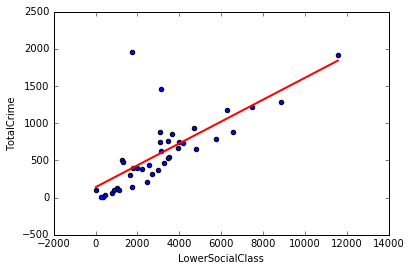

In [44]:
df_censuscrime.plot(kind='scatter', x='LowerSocialClass', y='TotalCrime')

# Now plot regression line
plt.plot(X_minmax, predictions, c='red', linewidth=2)
plt.savefig('LinearModel3-LowerSocialClass&Green.png')

In [29]:
# New model using more features and target feature changed to Lower Social Class as it shows higher correlations in general
lm = sm.ols(formula="LowerSocialClass ~ PopulationTotal + NoLowEducation", data=df_censuscrime).fit()
print(lm.params)

Intercept         -246.142111
PopulationTotal      0.050939
NoLowEducation       0.469846
dtype: float64


In [30]:
# this model has an R-squared value of 0.919 indicating high accuracy
# the intercept is insignificant (p-value=0.238)
# Population and NoLowEducation are both significant (p-value=0.000)

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       LowerSocialClass   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sat, 07 May 2016   Prob (F-statistic):           6.83e-21
Time:                        21:46:59   Log-Likelihood:                -317.79
No. Observations:                  40   AIC:                             641.6
Df Residuals:                      37   BIC:                             646.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -246.1421    205.405     

In [31]:
# Add green and retrain to see if accuracy increases
lm = sm.ols(formula="LowerSocialClass ~ Green + PopulationTotal + NoLowEducation", data=df_censuscrime).fit()
print(lm.params)

Intercept         -198.458501
Green              -34.573529
PopulationTotal      0.062355
NoLowEducation       0.450269
dtype: float64


In [32]:
# R-squared and Adjusted R-squared values are both higher indicating increased accuracy
# All features except for the intercept are showing as being significant (Green p-value=0.033)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       LowerSocialClass   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 07 May 2016   Prob (F-statistic):           1.13e-20
Time:                        21:46:59   Log-Likelihood:                -315.23
No. Observations:                  40   AIC:                             638.5
Df Residuals:                      36   BIC:                             645.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -198.4585    196.501     

In [33]:
# New data frame for prediction
X_new = pd.DataFrame({'Green':[7], 'PopulationTotal':[25668], 'NoLowEducation':[4511]})
X_new.head()

,Green,NoLowEducation,PopulationTotal
0,7,4511,25668


In [34]:
lm.predict(X_new)

array([ 3191.21288764])

In [35]:
X_minmax = pd.DataFrame({'Green': [df_censuscrime.Green.min(), df_censuscrime.Green.max()], 'PopulationTotal': [df_censuscrime.PopulationTotal.min(), df_censuscrime.PopulationTotal.max()],  'NoLowEducation': [df_censuscrime.NoLowEducation.min(), df_censuscrime.NoLowEducation.max()]})
X_minmax.head()

,Green,NoLowEducation,PopulationTotal
0,0,23,407
1,35,15209,98078


In [36]:
predictions = lm.predict(X_minmax)
predictions

array([  -162.72390382,  11555.24236592])

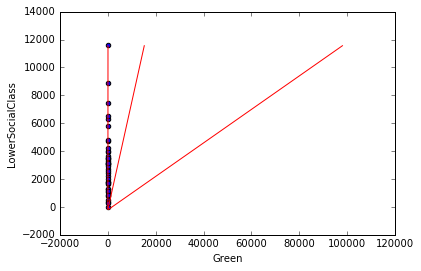

In [37]:
df_censuscrime.plot(kind='scatter', x='Green', y='LowerSocialClass')

plt.plot(X_minmax, predictions, c='red', linewidth=1)
plt.savefig('LinearModel2-Green&LowerSocialClass.png')

## Evaluate quality of model on the training data

##### Analysis
R-squared value is 0.549 for ths feature.
P-value of 0.000 indicates that this feature is significant in predicting the target feature.

Since this is an analysis into social issues it is therefore necessary to do further analysis to see which features, if any, can be used to succesfully predict LowerSocialClass. This information could then be applied in predicting TotalCrime.

In [45]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       LowerSocialClass   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 07 May 2016   Prob (F-statistic):           1.13e-20
Time:                        21:47:02   Log-Likelihood:                -315.23
No. Observations:                  40   AIC:                             638.5
Df Residuals:                      36   BIC:                             645.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -198.4585    196.501     

### Perform multiple linear regression using LowerSocialClass as the target feature. Use the combination of Green and PopulationTotal to train the model.

In [63]:
lm = sm.ols(formula="LowerSocialClass ~ Green + PopulationTotal + NoLowEducation", data=df_censuscrime).fit()

# Print the weights learned for this target feature
print(lm.params)

Intercept         -198.458501
Green              -34.573529
PopulationTotal      0.062355
NoLowEducation       0.450269
dtype: float64


In [64]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       LowerSocialClass   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     155.8
Date:                Sat, 07 May 2016   Prob (F-statistic):           1.13e-20
Time:                        22:01:34   Log-Likelihood:                -315.23
No. Observations:                  40   AIC:                             638.5
Df Residuals:                      36   BIC:                             645.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -198.4585    196.501     

In [65]:
df_train = df_censuscrime[:28]
df_train

,Unnamed: 0,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,MiddleEducation,HighEducation,EducationCeasedYoung,ContinuedEducation,StillInEducation,GoodHealth,PoorHealth,TotalCrime,LowerSocialClass,HigherSocialClass
0,0,Salthill,107,118,87,338,13856,15474,29330,12545,...,2176,7841,2321,13165,1695,26656,257,312,2691,18473
1,1,Galway,391,503,290,2256,22255,22889,45144,17788,...,3578,8318,5453,18626,3123,38866,645,1184,6299,19175
2,2,Balbriggan,193,168,179,470,11746,12296,24042,9191,...,2503,2857,3946,7305,1582,21544,281,540,3520,11808
3,3,Ballyfermot,272,173,349,820,13247,14332,27579,9627,...,2257,2445,9478,7067,1247,23211,546,794,5774,10421
4,4,Ballymun,189,217,260,752,10408,11267,21675,6870,...,1592,1728,5583,5804,1405,18275,426,666,3939,7983
5,5,BlackrockCoDublin,243,106,156,354,15003,16975,31978,13827,...,1622,11511,2623,15370,1153,29235,284,505,1272,24996
6,6,Blanchardstown,790,543,579,2084,48192,49886,98078,42376,...,8384,18095,13173,34990,7495,88883,904,1912,11573,55093
7,7,BridewellDublin,279,174,299,4611,11883,11111,22994,10800,...,1663,5417,4071,9569,1983,19394,438,752,4010,10132
8,8,Cabinteely,230,83,74,310,15800,16954,32754,13227,...,2294,8284,4290,13650,1195,29667,303,387,2226,23632
9,9,Cabra,172,130,157,598,10342,11509,21851,9363,...,1677,4010,5234,7904,1096,18719,371,459,3269,11509


In [66]:
df_test = df_censuscrime[28:]
df_test

,Unnamed: 0,Garda Station,Theft,Assault & Kidnapping,Fraud & Drugs & Weapons,Environment & Public Order,PopulationTotalMale,PopulationTotalFemale,PopulationTotal,PrincipalStatusAtWork,...,MiddleEducation,HighEducation,EducationCeasedYoung,ContinuedEducation,StillInEducation,GoodHealth,PoorHealth,TotalCrime,LowerSocialClass,HigherSocialClass
28,28,Santry,343,233,156,659,16713,18973,35686,14141,...,2727,6453,7575,13204,1664,30488,668,732,4192,19001
29,29,Shankill,173,100,161,421,10929,11765,22694,9171,...,1823,4390,3781,8645,920,20301,256,434,2541,13908
30,30,Skerries,48,51,30,133,5567,5844,11411,4358,...,999,2243,1735,4258,371,10360,108,129,1037,7540
31,31,Store Street,447,414,592,2327,10782,10641,21423,11262,...,1415,4983,2414,9519,2679,18155,247,1453,3148,8993
32,32,Sundrive Road,334,125,188,495,11993,13239,25232,9789,...,1987,3671,7683,7925,1172,21025,562,647,4783,10851
33,33,Swords,310,219,356,829,24291,24858,49149,23040,...,5214,8029,7663,17744,2695,44412,426,885,6548,28373
34,34,Athleague,5,6,3,7,1523,1471,2994,1232,...,303,407,605,1042,76,2628,32,14,368,1722
35,35,Ballaghaderreen,30,46,20,91,3061,2924,5985,1891,...,635,569,1646,1685,177,5013,137,96,1119,2428
36,36,Boyle,25,19,15,51,2992,3114,6106,2349,...,662,918,1452,1951,129,5246,78,59,803,3439
37,37,Castlerea,10,48,39,68,3175,2806,5981,2016,...,560,596,1221,2362,283,4865,104,97,865,2623


In [69]:
# Train the model on the training set
lm = sm.ols(formula = 'LowerSocialClass ~ Green + PopulationTotal + NoLowEducation', data=df_train).fit()
print(lm.params)

Intercept         -279.359843
Green              -38.089469
PopulationTotal      0.060773
NoLowEducation       0.465289
dtype: float64


In [70]:
# Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       LowerSocialClass   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     96.37
Date:                Sat, 07 May 2016   Prob (F-statistic):           1.60e-13
Time:                        22:01:48   Log-Likelihood:                -222.56
No. Observations:                  28   AIC:                             453.1
Df Residuals:                      24   BIC:                             458.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -279.3598    286.527     

In [71]:
predictedtrain = lm.predict(df_train)
predictedtrain

array([  2271.40791834,   4995.15837275,   2651.23218058,   5772.05825364,
         3690.29165609,   2550.13209312,  10897.95599081,   3129.49124252,
         2267.13038046,   3362.19315648,   3941.88586338,   9894.16411765,
         2204.82537912,   -243.92371208,   3629.02349353,   7243.14365682,
         2634.56877453,    315.94881815,   2345.77156126,   1893.1991653 ,
         3794.39033157,   3281.48415401,   3605.72286776,   2037.4495466 ,
         3132.1643783 ,   2859.9755126 ,   1807.23690401,   3886.91794271])

In [72]:
[df_train.LowerSocialClass, lm.predict(df_train)]

[0      2691
 1      6299
 2      3520
 3      5774
 4      3939
 5      1272
 6     11573
 7      4010
 8      2226
 9      3269
 10     3112
 11     8860
 12     1306
 13       17
 14     3082
 15     7454
 16     3465
 17      465
 18     1630
 19     1784
 20     4706
 21     3653
 22     3485
 23     2445
 24     1992
 25     3099
 26     1758
 27     2965
 Name: LowerSocialClass, dtype: int64,
 array([  2271.40791834,   4995.15837275,   2651.23218058,   5772.05825364,
          3690.29165609,   2550.13209312,  10897.95599081,   3129.49124252,
          2267.13038046,   3362.19315648,   3941.88586338,   9894.16411765,
          2204.82537912,   -243.92371208,   3629.02349353,   7243.14365682,
          2634.56877453,    315.94881815,   2345.77156126,   1893.1991653 ,
          3794.39033157,   3281.48415401,   3605.72286776,   2037.4495466 ,
          3132.1643783 ,   2859.9755126 ,   1807.23690401,   3886.91794271])]

In [73]:
# Pair actual and predicted values
print("Actual-Predicted:\n", (df_train.LowerSocialClass - lm.predict(df_train)))
print("\n(Actual-Predicted) squared:\n", (df_train.LowerSocialClass - lm.predict(df_train))**2)

Actual-Predicted:
 0      419.592082
1     1303.841627
2      868.767819
3        1.941746
4      248.708344
5    -1278.132093
6      675.044009
7      880.508757
8      -41.130380
9      -93.193156
10    -829.885863
11   -1034.164118
12    -898.825379
13     260.923712
14    -547.023494
15     210.856343
16     830.431225
17     149.051182
18    -715.771561
19    -109.199165
20     911.609668
21     371.515846
22    -120.722868
23     407.550453
24   -1140.164378
25     239.024487
26     -49.236904
27    -921.917943
Name: LowerSocialClass, dtype: float64

(Actual-Predicted) squared:
 0     1.760575e+05
1     1.700003e+06
2     7.547575e+05
3     3.770379e+00
4     6.185584e+04
5     1.633622e+06
6     4.556844e+05
7     7.752957e+05
8     1.691708e+03
9     8.684964e+03
10    6.887105e+05
11    1.069495e+06
12    8.078871e+05
13    6.808118e+04
14    2.992347e+05
15    4.446040e+04
16    6.896160e+05
17    2.221625e+04
18    5.123289e+05
19    1.192446e+04
20    8.310322e+05
21    1.3

In [74]:
# Get Mean Squared Error
meansqerr = ((df_train.LowerSocialClass - lm.predict(df_train))**2).mean()
print("\nThe Mean Squared Error is:\n", meansqerr)


The Mean Squared Error is:
 469314.396252


In [75]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_train.LowerSocialClass - lm.predict(df_train)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 555.669093077


In [76]:
[df_test.LowerSocialClass, lm.predict(df_test)]

# Print the Mean Squared Error of the model on the test set
mse = ((df_test.LowerSocialClass - lm.predict(df_test))** 2).mean()
print("\nMean Squared Error:\n", mse)

# Print the Mean Absolute Error of the model on the test set
mae = abs(df_test.LowerSocialClass - lm.predict(df_test)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Squared Error:
 298532.288603

Mean Absolute Error:
 355.450205038


In [62]:
squared_differences = (df_censuscrime.LowerSocialClass - lm.predict(df_censuscrime))** 2
print("\n(Actual-Predicted)^2:\n", squared_differences)

# Mean Squared Error
mse = squared_differences.mean()
print("\nMean Squared Error:\n", mse)

# Root Mean Squared Error
rmse= mse ** 0.5
print("\nRoot Mean Squared Error:\n", rmse)


(Actual-Predicted)^2:
 0     1.760575e+05
1     1.700003e+06
2     7.547575e+05
3     3.770379e+00
4     6.185584e+04
5     1.633622e+06
6     4.556844e+05
7     7.752957e+05
8     1.691708e+03
9     8.684964e+03
10    6.887105e+05
11    1.069495e+06
12    8.078871e+05
13    6.808118e+04
14    2.992347e+05
15    4.446040e+04
16    6.896160e+05
17    2.221625e+04
18    5.123289e+05
19    1.192446e+04
20    8.310322e+05
21    1.380240e+05
22    1.457401e+04
23    1.660974e+05
24    1.299975e+06
25    5.713271e+04
26    2.424273e+03
27    8.499327e+05
28    2.697435e+05
29    6.309028e+02
30    2.010432e+04
31    7.863490e+05
32    3.918661e+04
33    2.211773e+06
34    3.379804e+04
35    8.470397e+04
36    2.794462e+04
37    6.342862e+02
38    1.073679e+05
39    1.513017e+02
Name: LowerSocialClass, dtype: float64

Mean Squared Error:
 418079.763958

Root Mean Squared Error:
 646.590878344
